Assignment 2 | MATHEW SLADE

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

In [270]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt # for plotting          
import numpy as np
from copy import copy
from math import sin, cos, pi

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt # for plotting          
import numpy as np
from copy import copy
#modified for 3 dimensions
class Particle(object):

    """Class that describes particle"""
    m = 1.0

    def __init__(self, x0=0.0, y0=0.0, z0=0.0, vx0=0.0, vy0=0.0, vz0=0.0, mz = 0.0, tf = 10.0, dt = 0.001):
        self.x = x0
        self.y = y0
        self.z = z0
        self.vx = vx0
        self.vy = vy0
        self.vz = vz0
        self.t = 0.0
        self.tf = tf
        self.dt = dt

        self.tlabel = 'time (s)'
        self.xlabel = 'x (m)'
        self.ylabel = 'y (m)'
        self.zlabel = 'z (m)'
        self.vxlabel = 'vx (m/s)'
        self.vylabel = 'vy (m/s)'
        self.vzlabel = 'vz (m/s)'

        npoints = int(tf/dt) # always starting at t = 0.0
        self.npoints = npoints
        self.tarray = np.linspace(0.0, tf,npoints, endpoint = True) # include final timepoint
        self.xv0 = np.array([self.x, self.vx]) # NumPy array with initial position and velocity
        self.yv0 = np.array([self.y, self.vy])
        self.zv0 = np.array([self.z, self.vz])

        print("A new particle has been init'd")

    def Fx(self, x, vx, t):
        # The force on a free particle is 0
        return array([0.0])
    
    def Fy(self, y, vy, t):
        # The force on a free particle is 0
        return array([0.0])
    
    def Fz(self, z, vz, t):
        # The force on a free particle is 0
        return array([0.0])
    
    def xEuler_step(self): 
        a = self.Fx(self.x, self.vx, self.t) / self.m
        self.x += self.vx * self.dt
        self.vx += a * self.dt
        self.t += self.dt
        
    def yEuler_step(self): 
        """
        Take a single time step using Euler method
        """
        
        a = self.Fy(self.y, self.vy, self.t) / self.m
        self.y += self.vy * self.dt
        self.vy += a * self.dt
        self.t += self.dt
        
    def zEuler_step(self): 
        """
        Take a single time step using Euler method
        """
        
        a = self.Fz(self.z, self.vz, self.t) / self.m
        self.z += self.vz * self.dt
        self.vz += a * self.dt
        self.t += self.dt

    def xRK4_step(self):
        """
        Take a single time step using RK4 midpoint method
        """
        
        a1 = self.Fx(self.x, self.vx, self.t) / self.m
        k1 = np.array([self.vx, a1])*self.dt

        a2 = self.Fx(self.x+k1[0]/2, self.vx+k1[1]/2, self.t+self.dt/2) / self.m
        k2 = np.array([self.vx+k1[1]/2 ,a2])*self.dt
        
        a3 = self.Fx(self.x+k2[0]/2, self.vx+k2[1]/2, self.t+self.dt/2) / self.m
        k3 = np.array([self.vx+k2[1]/2, a3])*self.dt
        
        a4 = self.Fx(self.x+k3[0], self.vx+k3[1], self.t+self.dt) / self.m
        k4 = np.array([self.vx+k3[1], a4])*self.dt

        self.x += (k1[0]+ k4[0])/6 + (k2[0] + k3[0])/3
        self.vx += (k1[1]+ k4[1])/6 + (k2[1] + k3[1])/3
        
        self.t += self.dt
        
    def yRK4_step(self):
        """
        Take a single time step using RK4 midpoint method
        """
        
        a1 = self.Fy(self.y, self.vy, self.t) / self.m
        k1 = np.array([self.vy, a1])*self.dt

        a2 = self.Fy(self.y+k1[0]/2, self.vy+k1[1]/2, self.t+self.dt/2) / self.m
        k2 = np.array([self.vy+k1[1]/2 ,a2])*self.dt
        
        a3 = self.Fy(self.y+k2[0]/2, self.vy+k2[1]/2, self.t+self.dt/2) / self.m
        k3 = np.array([self.vy+k2[1]/2, a3])*self.dt
        
        a4 = self.Fy(self.y+k3[0], self.vy+k3[1], self.t+self.dt) / self.m
        k4 = np.array([self.vy+k3[1], a4])*self.dt

        self.y += (k1[0]+ k4[0])/6 + (k2[0] + k3[0])/3
        self.vy += (k1[1]+ k4[1])/6 + (k2[1] + k3[1])/3
        
        self.t += self.dt
        
    def zRK4_step(self):
        """
        Take a single time step using RK4 midpoint method
        """
        
        a1 = self.Fz(self.z, self.vz, self.t) / self.m
        k1 = np.array([self.vz, a1])*self.dt

        a2 = self.Fz(self.z+k1[0]/2, self.vz+k1[1]/2, self.t+self.dt/2) / self.m
        k2 = np.array([self.vz+k1[1]/2 ,a2])*self.dt
        
        a3 = self.Fz(self.z+k2[0]/2, self.vz+k2[1]/2, self.t+self.dt/2) / self.m
        k3 = np.array([self.vz+k2[1]/2, a3])*self.dt
        
        a4 = self.Fz(self.z+k3[0], self.vz+k3[1], self.t+self.dt) / self.m
        k4 = np.array([self.vz+k3[1], a4])*self.dt

        self.z += (k1[0]+ k4[0])/6 + (k2[0] + k3[0])/3
        self.vz += (k1[1]+ k4[1])/6 + (k2[1] + k3[1])/3
        
        self.t += self.dt

    def xEuler_trajectory(self):  
        """
        Loop over all time steps to construct a trajectory with Euler method
        Will reinitialize euler trajectory everytime this method is called
        """
        
        x_euler = []
        vx_euler = []
        
        while(self.t < self.tf-self.dt/2):
            vx_euler.append(self.vx)
            x_euler.append(self.x)
            self.xEuler_step()
        
        self.x_euler = np.array(x_euler)
        self.vx_euler = np.array(vx_euler)
        
    def yEuler_trajectory(self):  
        """
        Loop over all time steps to construct a trajectory with Euler method
        Will reinitialize euler trajectory everytime this method is called
        """
        
        y_euler = []
        vy_euler = []
        
        while(self.t < self.tf-self.dt/2):
            vy_euler.append(self.vy)
            y_euler.append(self.y)
            self.yEuler_step()
        
        self.y_euler = np.array(y_euler)
        self.vy_euler = np.array(vy_euler)
        
    def zEuler_trajectory(self):  
        """
        Loop over all time steps to construct a trajectory with Euler method
        Will reinitialize euler trajectory everytime this method is called
        """
        
        z_euler = []
        vz_euler = []
        
        while(self.t < self.tf-self.dt/2):
            vz_euler.append(self.vz)
            z_euler.append(self.z)
            self.zEuler_step()
        
        self.z_euler = np.array(z_euler)
        self.vz_euler = np.array(vz_euler)    
    
    def xRK4_trajectory(self): 
        """
        Loop over all time steps to construct a trajectory with RK4 method
        Will reinitialize euler trajectory everytime this method is called
        """
        
        x_RK4 = []
        vx_RK4 = []
        
        while(self.t < self.tf - self.dt/2):
            x_RK4.append(self.x)
            vx_RK4.append(self.vx)
            self.xRK4_step()

        self.x_RK4 = np.array(x_RK4)
        self.vx_RK4 = np.array(vx_RK4)
        
    def yRK4_trajectory(self): 
        """
        Loop over all time steps to construct a trajectory with RK4 method
        Will reinitialize euler trajectory everytime this method is called
        """
        
        y_RK4 = []
        vy_RK4 = []
        
        while(self.t < self.tf - self.dt/2):
            y_RK4.append(self.y)
            vy_RK4.append(self.vy)
            self.yRK4_step()

        self.y_RK4 = np.array(y_RK4)
        self.vy_RK4 = np.array(vy_RK4)
        
    def zRK4_trajectory(self): 
        """
        Loop over all time steps to construct a trajectory with RK4 method
        Will reinitialize euler trajectory everytime this method is called
        """
        
        z_RK4 = []
        vz_RK4 = []
        
        while(self.t < self.tf - self.dt/2):
            z_RK4.append(self.z)
            vz_RK4.append(self.vz)
            self.zRK4_step()

        self.z_RK4 = np.array(z_RK4)
        self.vz_RK4 = np.array(vz_RK4)    

    def scipy_trajectory(self):
        """calculate trajectory using SciPy ode integrator"""
        
        self.xv = odeint(self.derivative, self.xv0, self.tarray)

    def derivative(self, xv, t):
        """right hand side of the differential equation
            Required for odeint """
        
        x =xv[0]
        vx =xv[1]
        a = self.Fx(x, vx, t) / self.m
        return np.ravel(np.array([v, a]))

    def xresults(self):
        """ 
        Print out results in a nice format
        """
        
        print('\n\t Position and Velocity at Final Time:')
        print('Euler:')
        print('t = {} x = {} vx = {}'.format(self.t, self.x , self.vx))
        
        if hasattr(self, 'xv'):
            print('SciPy ODE Integrator:')
            print('t = {} x = {} vx = {}'.format(self.tarray[-1], self.xv[-1, 0], self.xv[-1,1]))
            
    def yresults(self):
        print('\n\t Position and Velocity at Final Time:')
        print('Euler:')
        print('t = {} y = {} vy = {}'.format(self.t, self.y , self.vy))
        
    def zresults(self):
        print('\n\t Position and Velocity at Final Time:')
        print('Euler:')
        print('t = {} z = {} vz = {}'.format(self.t, self.z , self.vz))

    def plot(self):
        """ 
        Make nice plots of our results
        """

        fig1 = plt.figure()
        ax1 = fig1.add_subplot(111)
        ay1 = fig1.add_subplot(111)
        az1 = fig1.add_subplot(111)
        
        if hasattr(self,'xv'):
            fig2 = plt.figure()
            ax2 = fig2.add_subplot(111)
            ax1.plot(self.tarray, self.xv[:, 0], "k", label = 'odeint')
            ax2.plot(self.xv[:, 0], self.xv[:, 1], "k", label = 'odeint')
            ax1.set_title('Trajectory')
            ax1.set_xlabel("t")
            ax1.set_ylabel("x")
            ax2.set_title('Phase space')
            ax2.set_xlabel("v")
            ax2.set_ylabel("x")
            ax1.legend()
            ax2.legend()
        if hasattr(self,'x_euler'):
            ax1.plot(self.tarray, self.x_euler, "b", label = 'euler')
            ax1.set_title('X Trajectory')
            ax1.set_xlabel("t")
            ax1.set_ylabel("x")
            ax1.legend()
        if hasattr(self,'x_RK4'):
            ax1.plot(self.tarray, self.x_RK4, "r", label = 'RK4')
            ax1.set_title('X Trajectory')
            ax1.set_xlabel("t")
            ax1.set_ylabel("x")
            ax1.legend()
        if hasattr(self, 'y_euler'):
            ay1.plot(self.tarray, self.y_euler, "b", label = 'euler')
            ay1.set_title('Y Trajectory')
            ay1.set_xlabel("t")
            ay1.set_ylabel("y")
            ay1.legend()
        if hasattr(self, 'z_euler'):
            az1.plot(self.tarray, self.z_euler, "b", label = 'euler')
            az1.set_title('Z Trajectory')
            az1.set_xlabel("t")
            az1.set_ylabel("z")
            az1.legend()
        if hasattr(self, 'y_RK4'):
            ay1.plot(self.tarray, self.y_RK4, "r", label = 'RK4')
            ay1.set_title('y Trajectory')
            ay1.set_xlabel("t")
            ay1.set_ylabel("y")
            ay1.legend()
        if hasattr(self, 'z_RK4'):
            az1.plot(self.tarray, self.z_RK4, "r", label = 'RK4')
            az1.set_title('Z Trajectory')
            az1.set_xlabel("t")
            az1.set_ylabel("z")
            az1.legend()
            

In [2]:
#Problem 1
class FallingParticle(Particle):
    g = 9.8

    def __init__(self,m = 1.0, x0 = 0, z0 = 0, y0 = 0 , vx0 = 0.0, vy0 = 0.0, vz0 = 0.0, tf = 10.0,  dt = 0.1):
        self.m = m
        super().__init__(x0,y0,z0,vx0,vy0,vz0,tf,dt) 
    
    def Fx(self, x, vx, t):
        return 0
    def Fy(self, y, vy, t):
        return 0
    def Fz(self, z, vz, t):
        return  -self.g*self.m

A new particle has been init'd

	 Position and Velocity at Final Time:
Euler:
t = 0.10000000000000007 z = 39999.950999999994 vz = -0.9800000000000009


/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


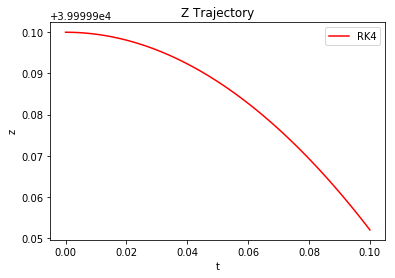

In [3]:
FallingMan = FallingParticle(x0 = 0.0, y0 = 0, z0 = 40000.0, tf = 15.0)
FallingMan.zRK4_trajectory()
FallingMan.zresults()
FallingMan.plot()

In [302]:
class DragParticleConstant(Particle): #Where a particle falls through an atmosphere of constant air density and simplified gravity
    g = 9.8
    def __init__(self, x0 = 0, y0 = 0, z0 = 0, vx0 = 0.0, vy0 = 0.0, vz0 = 0.0, tf = 10.0,  dt = 0.1):
        super().__init__(x0, y0, z0, vx0, vy0, vz0,tf,dt)
    def Fx(self, x, vx, t):
        return 0
    def Fy(self, y, vy, t):
        A = 1.0
        M = 5.972*10**24
        Cd = 0.5
        Rho0 = 1.225
        ae = 6.5*(10**-3)
        alpha = 2.5
        T0 = 298
        m = 1.0
        return -0.5*Cd*Rho0*A*vy**2
    def Fz(self, z, vz, t):
        A = 1.0
        M = 5.972*10**24
        Cd = 0.5
        Rho0 = 1.225
        ae = 6.5*(10**-3)
        alpha = 2.5
        T0 = 298
        m = 1.0
        return -self.g*self.m + 0.5*Cd*Rho0*A*vz**2

A new particle has been init'd

	 Position and Velocity at Final Time:
Euler:
t = 14.999999999999963 z = 39918.04575566479 vz = -5.656854249492379


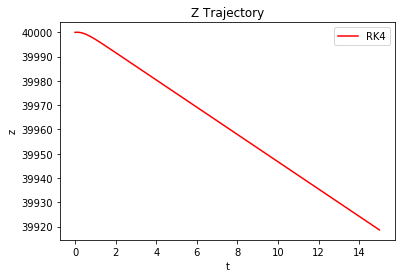

In [312]:
DraggingManC = DragParticleConstant(z0 = 40000, vz0 = 1.0, tf = 15.0)
DraggingManC.zRK4_trajectory()
DraggingManC.zresults()
DraggingManC.plot()

A new particle has been init'd

	 Position and Velocity at Final Time:
Euler:
t = 9.999999999999897 y = 30.27819737811223 vy = 0.3162055335968505


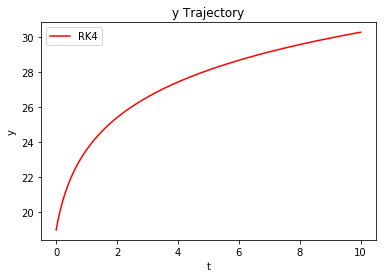

In [268]:
DraggingManC = DragParticleConstant(y0=19, vy0 = 10, tf = 10.0, dt = 0.001)
DraggingManC.yRK4_trajectory()
DraggingManC.yresults()
DraggingManC.plot()

A new particle has been init'd

	 Position and Velocity at Final Time:
Euler:
t = 9.999999999999897 x = 0.0 vx = 0.0


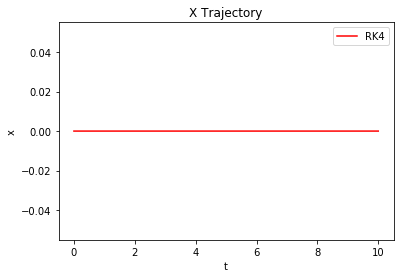

In [253]:
DraggingManC = DragParticleConstant()
DraggingManC.xRK4_trajectory()
DraggingManC.xresults()
DraggingManC.plot()

In [316]:
class DragParticleG(Particle): #Where a particle falls through an atmosphere of variable air density and simplified gravity
    g = 9.8
    def __init__(self, x0 = 0, y0 = 0, z0 = 0, vx0 = 0.0, vy0 = 0.0, vz0 = 0.0, tf = 10.0,  dt = 0.1):
        super().__init__(x0,y0,z0,vx0, vy0,vz0,tf,dt)
    def Fy(self, y, vy, t):
        A = 1.0
        M = 5.972*10**24
        Cd = 0.5
        Rho0 = 1.0
        ae = 6.5*(10**-3)
        alpha = 2.5
        T0 = 298
        m = 1.0
        return 0.5*Cd*Rho0*((1-(ae*z/T0))**alpha)*A*vy**2
    def Fz(self, z, vz, t):
        A = 1.0
        M = 5.972*10**24
        Cd = 0.5
        Rho0 = 1.0
        ae = 6.5*(10**-3)
        alpha = 2.5
        T0 = 298
        m = 1.0
        return -self.g*self.m + 0.5*Cd*Rho0*((1-(ae*z/T0))**alpha)*A*vz**2
    

A new particle has been init'd

	 Position and Velocity at Final Time:
Euler:
t = 9.99999999999998 z = 39599.762520088756 vz = -66.15357158761336


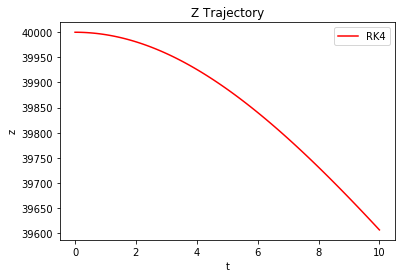

In [317]:
DraggingManG = DragParticleG(z0 = 40000, vz0 = 0.0, tf = 10.0)
DraggingManG.zRK4_trajectory()
DraggingManG.zresults()
DraggingManG.plot()

In [319]:
class DragParticle(Particle): #Where a particle falls through an atmosphere of constant air density and non-simplified gravity
    A = 1.0
    M = 5.972*10**24
    def __init__(self, x0 = 0, y0 = 0, z0 = 0, vx0 = 0.0, vy0 = 0.0, vz0 = 0.0, tf = 10.0,  dt = 0.1):
        super().__init__(x0, y0, z0, vx0, vy0, vz0, tf,dt) 
    def Fy(self, y, vy, t):
        return 0.5*Cd*Rho0*A*vy**2
    def Fz(self, z, vz, t):
        A = 1.0
        M = 5.972*10**24
        Cd = 0.5
        Rho0 = 1.0
        ae = 6.5*(10**-3)
        alpha = 2.5
        T0 = 298
        m = 1.0
        return -6.67*(10**-11)*M*m/(z+(6371*10**3))**2 + 0.5*Cd*Rho0*A*vz**2
    

A new particle has been init'd

	 Position and Velocity at Final Time:
Euler:
t = 9.99999999999998 z = 79940.89585756538 vz = -6.187705202166292


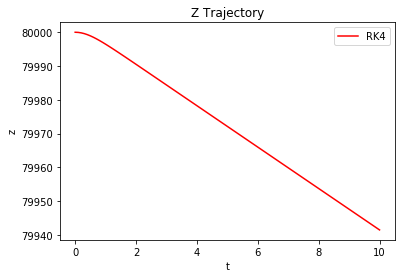

In [320]:
DraggingMan = DragParticle(z0 = 80000, vz0 = 0.0, tf = 10.0)
DraggingMan.zRK4_trajectory()
DraggingMan.zresults()
DraggingMan.plot()

In [23]:
#Problem 2
from numpy import cross
from numpy import array
from math import pi, sqrt, e

In [325]:
class SpinningBasketball(Particle):
    g = 9.8
    def __init__(self, x0 = 0.0, y0 = 0.0, z0 = 0.0, vx0 = 0.0, vy0 = 0.0, vz0 = 0.0, tf = 25.0,  dt = 0.1):
        super().__init__(x0, y0, z0,vx0,vy0,vz0,tf,dt)
    def Fx(self, x, vx, t):
        return 0
    def Fy(self, y, vy, t):
        m = 0.62 #The mass of a basketball in kg
        A = 0.045708296 #The cross sectional area of a basketball in m
        crit = 10.0
        X = (vy - crit)/4
        CONSTA = 0.25
        CONSTB = 0.25
        CONSTC = 0.16
        r = sqrt(A/pi)
        w = 2*pi
        Rho0 = 1.225
        if vy == 0:
            vely6 = vy**.6
        else:
            vely6 = 0
        if X < 0.0:
            Q = e**(-X**2)
        elif X > 0.0:
            Q = e**((-X**2)/4)
        else:
            Q = 1
        Cd = CONSTA + CONSTB/(1 + e**X) + CONSTC*Q
        return -0.5*Cd*Rho0*A*vy**2 + 0.25*Rho0*A*((r*w)**.4)*(vely6)*vy
    def Fz(self, z, vz, t):
        m = 0.62 #The mass of a basketball in kg
        A = 0.045708296 #The cross sectional area of a basketball in m
        crit = 10.0
        X = (vz - crit)/4
        CONSTA = 0.25
        CONSTB = 0.25
        CONSTC = 0.16
        r = sqrt(A/pi)
        w = 2*pi
        Rho0 = 1.225
        if vz == 0:
            velz6 = vz**.6
        else:
            velz6 = 0
        if X < 0.0:
            Q = e**(-X**2)
        elif X > 0.0:
            Q = e**((-X**2)/4)
        else:
            Q = 1
        Cd = CONSTA + CONSTB/(1 + e**X) + CONSTC*Q
        return -self.g*self.m + 0.5*Cd*Rho0*A*vz**2 + 0.25*Rho0*A*((r*w)**.4)*(velz6)*vz

        #I get an error when I have v raised to the power of 1.6 but not when raised to the 2. So I implemented "vel16" 
        #The angular velocity and the translational velocity of the basketball are perpendicular so 
        #the cross product can be simplified.
    

A new particle has been init'd

	 Position and Velocity at Final Time:
Euler:
t = 14.999999999997126 z = -13.402160117521944 vz = -26.458223545296093


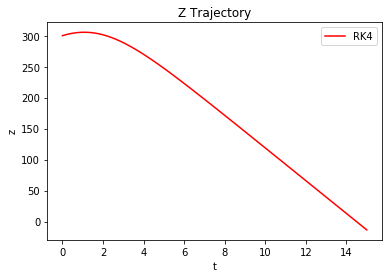

In [326]:
SpinningMan = SpinningBasketball(z0 = 300, vz0 = 10, tf = 15.0, dt = 0.001)
SpinningMan.zRK4_trajectory()
SpinningMan.zresults()
SpinningMan.plot()

A new particle has been init'd

	 Position and Velocity at Final Time:
Euler:
t = 14.999999999997126 y = 0.014998484180881016 v = 0.0009997979043996682


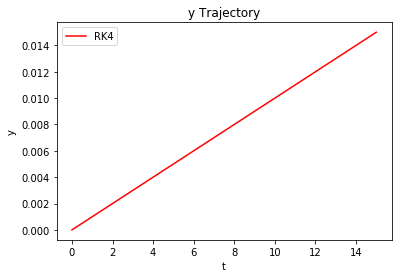

In [232]:
SpinningMan = SpinningBasketball(y0 = 0, v0 = .001, tf = 15.0, dt = 0.001)
SpinningMan.yRK4_trajectory()
SpinningMan.yresults()
SpinningMan.plot()

In [ ]:
class SideSpinBasketball(Particle):
    g = 9.8
    def __init__(self, x0 = 1.0, v0 = 0.0, tf = 10.0,  dt = 0.1):
        super().__init__(x0,v0,tf,dt)
    def F(self, x, v, t):
        m = 0.62 #The mass of a basketball in kg
        A = 0.045708296 #The cross sectional area of a basketball in m
        crit = 10.0
        X = (v - crit)/4
        CONSTA = 0.25
        CONSTB = 0.25
        CONSTC = 0.16
        r = sqrt(A/pi)
        w = pi/2
        Rho0 = 1.225
        if v == 0:
            vel16 = v**1.6
        else:
            vel16 = 0
        if X < 0.0:
            Q = e**(-X**2)
        elif X > 0.0:
            Q = e**((-X**2)/4)
        else:
            Q = 1
        Cd = CONSTA + CONSTB/(1 + e**X) + CONSTC*Q
        return -self.g*self.m + 0.5*Cd*Rho0*A*v**2 + 0.25*Rho0*A*((r*w)**.4)*(vel16)
    #I might need to make the force a vector? Probably not... What if I just keep the vertical force the same, 
    #use that to calculate the time it hits the ground, and then calculate the horizontal displacement with an additional
    #Magnus force because it mathematically shouldn't affect vertical displacement? I think that works.

ERROR:root:File `'Python.py'` not found.


In [ ]:
#Problem 3


In [ ]:
class ChargedParticle(Particle):
    def __init__(self,m = 1.0, x0 = 1.0 , v0 = 0.0, tf = 10.0,  dt = 0.1):
        self.m = m
        super().__init__(x0,v0,tf,dt)

In [ ]:
ChargedMan = ChargedParticle(vx0 = .4, tf = 15.0, dt = 0.001)

In [17]:
import numpy as np
a = np.array([1,2,3.3,3.4,3.5,5])
b = np.where(a <= 4)
print(b)

(array([0, 1, 2, 3, 4]),)


In [20]:
c = max(b)
print(c)

[0 1 2 3 4]


In [19]:
d = max(c)
print(d)

4


In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt # for plotting          
import numpy as np
from copy import copy
from pylab import xlim, ylim
from math import sqrt

class Particle(object):

    """Class that describes particle"""
    m = 1.0

    def __init__(self, KE, mz0 = 0.0, Bx0 = 0, By0 = 0, Bz0 = 0, x0 = 0.0, y0 = 0.0, z0 = 0.0, vx0 = 0.0, vy0 = 0.0, vz0 = 0.0, Omex0 = 0.0, Omey0 = 0.0, Omez0 = 0.0, tf = 10.0, dt = 0.001):
        self.mz = mz0
        self.Bx = Bx0
        self.By = By0
        self.Bz = Bz0
        self.Barray = [self.Bx,self.By,self.Bz]
        self.B = np.array(self.Barray,float)
        self.x = x0
        self.y = y0
        self.z = z0
        self.parray = [self.x,self.y,self.z]
        self.p = np.array(self.parray, float)
        self.vx = vx0
        self.vy = vy0
        self.vz = vz0
        self.varray = [self.vx,self.vy,self.vz]
        self.v = np.array(self.varray,float)
        self.Omex = Omex0
        self.Omey = Omey0
        self.Omez = Omez0
        self.Omearray = [self.Omex, self.Omey, self.Omez]
        self.Omega = np.array(self.Omearray,float)
        self.t = 0.0
        self.tf = tf
        self.dt = dt

        self.tlabel = 'time (s)'
        self.plabel = 'p (m)'
        self.vlabel = 'v (m/s)'

        npoints = int(tf/dt) # always starting at t = 0.0
        self.npoints = npoints
        self.tarray = np.linspace(0.0, tf,npoints, endpoint = True) # include final timepoint
        self.xv0 = np.array([self.p, self.v]) # NumPy array with initial position and velocity

        print("A new particle has been init'd")

    def F(self, p, v, t):
        # The force on a free particle is 0
        self.farray = np.array([0.0, 0.0, 0.0])
        return np.array(self.farray,float)

    def Euler_step(self): 
        """
        Take a single time step using Euler method
        """
        
        a = self.F(self.p, self.v, self.t) / self.m
        self.p += self.v * self.dt
        self.v += a * self.dt
        self.t += self.dt
        

    def RK4_step(self):
        """
        Take a single time step using RK4 midpoint method
        """
        a1 = self.F(self.p, self.v, self.t) / self.m
        k1 = np.array([self.v, a1])*self.dt

        a2 = self.F(self.p+k1[0]/2, self.v+k1[1]/2, self.t+self.dt/2) / self.m
        k2 = np.array([self.v+k1[1]/2 ,a2])*self.dt
        
        a3 = self.F(self.p+k2[0]/2, self.v+k2[1]/2, self.t+self.dt/2) / self.m
        k3 = np.array([self.v+k2[1]/2, a3])*self.dt
        
        a4 = self.F(self.p+k3[0], self.v+k3[1], self.t+self.dt) / self.m
        k4 = np.array([self.v+k3[1], a4])*self.dt

        self.p += (k1[0]+ k4[0])/6 + (k2[0] + k3[0])/3
        self.v += (k1[1]+ k4[1])/6 + (k2[1] + k3[1])/3
        
 
        self.t += self.dt

    def Euler_trajectory(self):  
        """
        Loop over all time steps to construct a trajectory with Euler method
        Will reinitialize euler trajectory everytime this method is called
        """
        
        px_euler = []
        vx_euler = []
        py_euler = []
        vy_euler = []
        pz_euler = []
        vz_euler = []
        
        while(self.t < self.tf-self.dt/2):
            vx_euler.append(self.v[0])
            px_euler.append(self.p[0])
            vy_euler.append(self.v[1])
            py_euler.append(self.p[1])
            vz_euler.append(self.v[2])
            pz_euler.append(self.p[2])
            self.Euler_step()
        
        self.px_euler = np.array(px_euler)
        self.vx_euler = np.array(vx_euler)
        self.py_euler = np.array(py_euler)
        self.vy_euler = np.array(vy_euler)
        self.pz_euler = np.array(pz_euler)
        self.vz_euler = np.array(vz_euler)
    
    def RK4_trajectory(self): 
        """
        Loop over all time steps to construct a trajectory with RK4 method
        Will reinitialize euler trajectory everytime this method is called
        """
        
        px_RK4 = []
        vx_RK4 = []
        py_RK4 = []
        vy_RK4 = []
        pz_RK4 = []
        vz_RK4 = []
        
        while(self.t < self.tf - self.dt/2):
            px_RK4.append(self.p[0])
            vx_RK4.append(self.v[0])
            py_RK4.append(self.p[1])
            vy_RK4.append(self.v[1])
            pz_RK4.append(self.p[2])
            vz_RK4.append(self.v[2])
            self.RK4_step()

        self.px_RK4 = np.array(px_RK4)
        self.vx_RK4 = np.array(vx_RK4)
        self.py_RK4 = np.array(py_RK4)
        self.vy_RK4 = np.array(vy_RK4)
        self.pz_RK4 = np.array(pz_RK4)
        self.vz_RK4 = np.array(vz_RK4)
        

    def scipy_trajectory(self):
        """calculate trajectory using SciPy ode integrator"""
        
        self.xv = odeint(self.derivative, self.xv0, self.tarray)

    def derivative(self, xv, t):
        """right hand side of the differential equation
            Required for odeint """
        
        p =xv[0]
        v =xv[1]
        a = self.F(p, v, t) / self.m
        return np.ravel(np.array([v, a]))

    def results(self):
        """ 
        Print out results in a nice format
        """
        
        print('\n\t Position and Velocity at Final Time:')
        print('Euler:')
        print('t = {} p = {} v = {}'.format(self.t, self.p , self.v))
        
        if hasattr(self, 'xv'):
            print('SciPy ODE Integrator:')
            print('t = {} p = {} v = {}'.format(self.tarray[-1], self.xv[-1, 0], self.xv[-1,1]))
            
    def chargedresults(self):
        print('\n\t Position and Velocity at Final Time:')
        print('t = {} p = {} v = {}'.format(self.t, self.p , self.v))

    def plot(self):
        """ 
        Make nice plots of our results
        """

        fig1 = plt.figure()
        fig2 = plt.figure()
        fig3 = plt.figure()
        ax1 = fig1.add_subplot(111)
        ax2 = fig2.add_subplot(111)
        ax3 = fig3.add_subplot(111)
        
        
        if hasattr(self,'xv'):
            ax1.plot(self.tarray, self.xv[:, 0], "k", label = 'odeint')
        if hasattr(self,'px_euler'):
            ax1.plot(self.tarray, self.px_euler, "b", label = 'euler')
            ax2.plot(self.tarray, self.py_euler, "b", label = 'euler')
            ax3.plot(self.tarray, self.pz_euler, "b", label = 'euler')
        if hasattr(self,'px_RK4'):
            ax1.plot(self.tarray, self.px_RK4, "r", label = 'RK4')
            ax2.plot(self.tarray, self.py_RK4, "r", label = 'RK4')
            ax3.plot(self.tarray, self.pz_RK4, "r", label = 'RK4')
            
        ax1.set_title('X Direction vs Time')
        ax1.set_xlabel("t (s)")
        ax1.set_ylabel("x (m)")
        ax2.set_title('Y Direction vs Time')
        ax2.set_xlabel("t (s)")
        ax2.set_ylabel("y (m)")
        ax3.set_title('Z Direction vs Time')
        ax3.set_xlabel("t (s)")
        ax3.set_ylabel("z (m)")

        ax1.legend()
        ax2.legend()
        ax3.legend()
        
    def trajplotcharged(self):
        fig1 = plt.figure()
        ax1 = fig1.add_subplot(111)
       
        
        if hasattr(self,'xv'):
            ax1.plot(-self.tarray, self.xv[:, 0], "k", label = 'odeint')
        if hasattr(self,'px_euler'):
            ax1.plot(-self.px_euler, self.py_euler, "b", label = 'euler')
        if hasattr(self,'px_RK4'):
            ax1.plot(-self.px_RK4, self.py_RK4, "r", label = 'RK4')
        xlim(0.0,0.55)
        ylim(0.0,0.50)
        ax1.set_title('Particle Trajectory')
        ax1.set_xlabel("x (m)")
        ax1.set_ylabel("y (m)")
        
        ax1.legend()
        
    def trajplot(self):
        fig1 = plt.figure()
        fig2 = plt.figure()
        fig3 = plt.figure()
        ax1 = fig1.add_subplot(111)
        ax2 = fig2.add_subplot(111)
        ax3 = fig3.add_subplot(111)

        
        if hasattr(self,'xv'):
            ax1.plot(self.tarray, self.xv[:, 0], "k", label = 'odeint')
        if hasattr(self,'px_euler'):
            ax1.plot(self.px_euler, self.py_euler, "b", label = 'euler')
            ax2.plot(self.py_euler, self.pz_euler, "b", label = 'euler')
            ax3.plot(self.pz_euler, self.px_euler, "b", label = 'euler')
        if hasattr(self,'px_RK4'):
            ax1.plot(self.px_RK4, self.py_RK4, "r", label = 'RK4')
            ax2.plot(self.py_RK4, self.pz_RK4, "r", label = 'RK4')
            ax3.plot(self.pz_RK4, self.px_RK4, "r", label = 'RK4')
        
        ax1.set_title('XY Trajectory')
        ax2.set_title('YZ Trajectory')
        ax3.set_title('XZ Trajectory')
        ax1.set_xlabel("x (m)")
        ax1.set_ylabel("y (m)")
        ax2.set_xlabel("y (m)")
        ax2.set_ylabel("z (m)")
        ax3.set_xlabel("z (m)")
        ax3.set_ylabel("x (m)")
        
        ax1.legend()
        ax2.legend()
        ax3.legend()
    

In [4]:
from math import pi, e

In [11]:
class SpinningBasketball(Particle):
    g = 9.8
    def __init__(self, x0 = 0, z0 = 0, y0 = 0 , vx0 = 0.0, vy0 = 0.0, vz0 = 0.0, Omex0 = 0.0, Omey0 = 0.0, Omez0 = 0.0, tf = 10.0,  dt = 0.1):
        super().__init__(x0,y0,z0,vx0,vy0,vz0,Omex0,Omey0,Omez0,tf,dt)
    def F(self, p, v, t):
        m = 0.62 #The mass of a basketball in kg
        A = 0.045708296 #The cross sectional area of a basketball in m
        crit = 10.0
        spin = sqrt(self.Omex**2 + self.Omey**2 * self.Omez**2)
        s = sqrt(self.vx**2 + self.vy**2 + self.vz**2)
        X = (s - crit)/4
        CONSTA = 0.25
        CONSTB = 0.25
        CONSTC = 0.16
        r = sqrt(A/pi)
        Rho0 = 1.225
        if X < 0.0:
            Q = e**(-X**2)
        elif X > 0.0:
            Q = e**((-X**2)/4)
        else:
            Q = 1
        Cd = CONSTA + CONSTB/(1 + e**X) + CONSTC*Q
        cross = np.cross(self.Omega,self.v)
        if spin == 0:
            SPINFORCEX = 0
            SPINFORCEY = 0
            SPINFORCEZ = 0 
        else: 
            SPINFORCEX = 0.25*Rho0*A*r*cross[0]*(s**.4)/(spin**.4 * r**.4)
            SPINFORCEY = 0.25*Rho0*A*r*cross[1]*(s**.4)/(spin**.4 * r**.4)
            SPINFORCEZ = 0.25*Rho0*A*r*cross[2]*(s**.4)/(spin**.4 * r**.4)
        return np.array([-0.5*Cd*Rho0*A*self.v[0]*s + SPINFORCEX, 
                         -0.5*Cd*Rho0*A*self.v[1]*s + SPINFORCEY,
                         -self.g*self.m + 0.5*Cd*Rho0*A*self.v[2]**2 + SPINFORCEZ])
    


A new particle has been init'd


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in double_scalars



	 Position and Velocity at Final Time:
Euler:
t = 9.999999999999897 p = [ 30.75867253  48.95394776         -inf] v = [ 1.20583403  1.91914447        -inf]


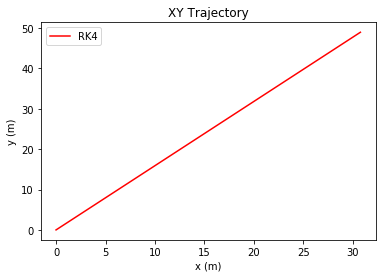

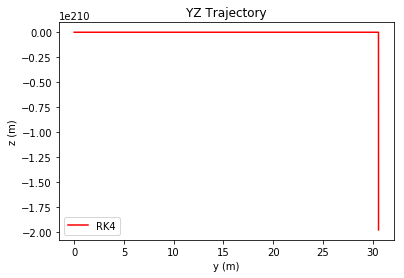

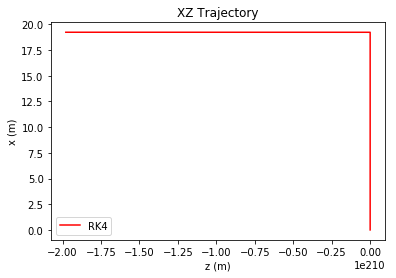

In [18]:
SpinningSideMan = SpinningBasketball(Omez0 = 2*pi, z0 = 0, vy0 = 1, tf = 10.0, dt = 0.01)
SpinningSideMan.RK4_trajectory()
SpinningSideMan.results()
SpinningSideMan.trajplot()